# Transform

In [3]:
import numpy as np
import pandas as pd
import pywsra
import xarray as xr
import littlebuoybigwaves as buoy
from configure import read_stored_variable

## Setup

In [4]:
%run 'nb1-transform.ipynb'
%run -i configure.py

# earl_masked_ds = read_stored_variable('earl_masked_ds')
# fiona_ds = read_stored_variable('fiona_ds')
# ian_ds = read_stored_variable('ian_ds')
# julia_ds = read_stored_variable('julia_ds')
# idalia_ds = read_stored_variable('idalia_ds')
# lee_ds = read_stored_variable('lee_ds')
# atomic_ds = read_stored_variable('atomic_ds')
earl_masked_ds = read_stored_variable('earl_masked_ds')
fiona_masked_ds = read_stored_variable('fiona_masked_ds')
ian_masked_ds = read_stored_variable('ian_masked_ds')
julia_masked_ds = read_stored_variable('julia_masked_ds')
idalia_masked_ds = read_stored_variable('idalia_masked_ds')
lee_masked_ds = read_stored_variable('lee_masked_ds')
atomic_masked_ds = read_stored_variable('atomic_masked_ds')

earl_drifter_df = read_stored_variable('earl_drifter_df')
fiona_drifter_df = read_stored_variable('fiona_drifter_df')
ian_drifter_df = read_stored_variable('ian_drifter_df')
idalia_drifter_df = read_stored_variable('idalia_drifter_df')
lee_drifter_df = read_stored_variable('lee_drifter_df')
atomic_swift_ds = read_stored_variable('atomic_swift_ds')

earl: 1818 masked values (64.3%).
fiona: 366 masked values (25.3%).
ian: 491 masked values (34.1%).
julia: 222 masked values (49.3%).
idalia: 108 masked values (13.8%).
lee: 907 masked values (38.9%).
atomic: 1154 masked values (47.4%).


/opt/homebrew/Caskroom/miniconda/base/envs/wsra-mss/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/wsra-mss/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [6]:
start_time = pd.Timestamp('2022-09-04 00:00:0')
end_time = pd.Timestamp('2022-09-09 00:00:00')
earl_masked_ds.sel(time=slice(start_time, end_time))

<xarray.Dataset>
Dimensions:                                (wavenumber_east: 65,
                                            wavenumber_north: 65,
                                            wavelength: 8, obs: 5, time: 1011,
                                            SPOT-1207_frequency: 79)
Coordinates:
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
  * time                                   (time) datetime64[ns] 2022-09-05T0...
    time_mask                              (time) float64 1.0 1.0 ... 1.0 1.0
  * SPOT-1207_frequency                    (SPOT-1207_frequency) float64 0.02...
Data variables: (12/41)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 78.93 70.81 ... 198.4
    dominant_wave_direction                (time) float32 69.54 66.06 ... 170.0
    dominant_wave_height                   (time) float32 1.095 1.04 ... 2.872
    dominant_wave_wavelength               (time) float32 108.6 103.4 ... 575.7
    ...                                     ...
    SPOT-1207_longitude                    (time) float64 nan nan ... nan nan
    SPOT-1207_latitude                     (time) float64 nan nan ... nan nan
    SPOT-1207_energy_density               (time, SPOT-1207_frequency) object ...
    SPOT-1207_significant_height           (time) float64 nan nan ... nan nan
    SPOT-1207_distance                     (time) float64 nan nan ... nan nan
    SPOT-1207_time_difference              (time) timedelta64[ns] NaT ... NaT
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220831H1', '20220901H1', '20220903H1', '2022090...
    mission_id:           ['WEWXA TRAIN', 'WGWXA AL91', '0506A EARL', '0706A ...
    storm_id:             AL062022
    date_created:         ['2022-11-07T20:04:58Z', '2022-11-11T16:36:08Z', '2...
    time_coverage_start:  2022-08-31T08:10:53+00:00
    time_coverage_end:    2022-09-08T14:19:49+00:00
    pywsra_file:          ['WSRA-L4-20220831H1.nc', 'WSRA-L4-20220901H1.nc', ...
    storm_name:           earl

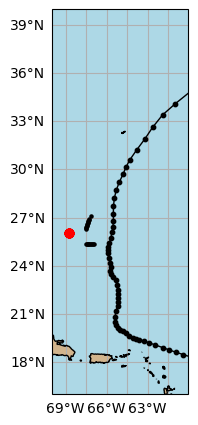

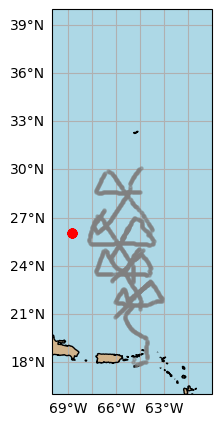

In [7]:
notnull = earl_masked_ds['SPOT-1207_latitude'].notnull()
earl_masked_ds.where(notnull)
# earl_masked_ds.sel(time=slice(start_time, end_time))

extent = (-70, -60, 16, 40)  #(<min longitude>, <max longitude>, <min latitude>, <max latitude>)
ax = earl_masked_ds.where(notnull).wsra.plot(plot_best_track=True, extent=extent)
#TODO: plot colocated buoys and WSRA track.
#TODO: need to fix plotting for PyWSRA
ax.scatter(earl_masked_ds['SPOT-1207_longitude'],
           earl_masked_ds['SPOT-1207_latitude'],
           color='r')

ax = earl_masked_ds.sel(time=slice(start_time, end_time)).wsra.plot(plot_best_track=False, extent=extent, color='grey', alpha=0.5)
ax.scatter(earl_masked_ds['SPOT-1207_longitude'],
           earl_masked_ds['SPOT-1207_latitude'],
           color='r')

In [8]:
notnull = atomic_masked_ds['swift_latitude'].notnull()
atomic_notnull_ds = atomic_masked_ds.where(notnull, drop=True)

(0.001, 100)

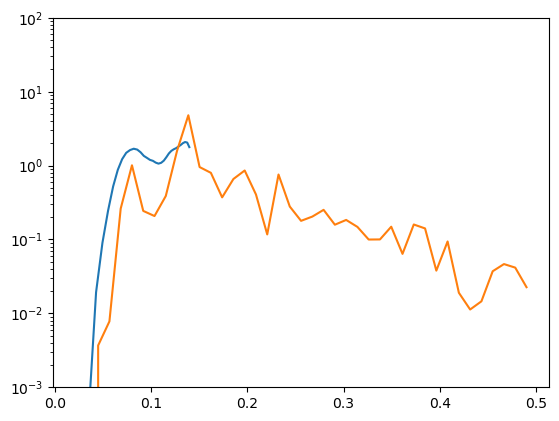

In [11]:
import matplotlib.pyplot as plt
start_time = pd.Timestamp('2020-02-05 00:00:0')
end_time = pd.Timestamp('2020-02-06 00:00:00')
# start_time = pd.Timestamp('2020-02-03 00:00:0')
# end_time = pd.Timestamp('2020-02-04 00:00:00')
time_slice = slice(start_time, end_time)


fig, ax = plt.subplots()
ax.plot(
    atomic_notnull_ds['frequency'],
    atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
)
ax.plot(
    atomic_notnull_ds['swift_freq'],
    atomic_notnull_ds.sel(time=time_slice)['swift_energy'].mean(axis=1),
)
# ax.set_xscale('log')
ax.set_yscale('log')

# date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
# ax.set_title(date_str)
# ax.legend(handles=create_legend_elements())
ax.set_ylim([10**(-3), 10**(2)])
ax.set_ylim([10**(-3), 10**(2)])

    atomic_notnull_ds['frequency'],
    atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
)

#TODO: test this feature.  Need to extend frequency array f
pywsra.plot_frequency_dir_spectrum(
    energy_density_fq_dir = atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
    wsra_in_hour['wavenumber_east'].values,
    wsra_in_hour['wavenumber_north'].values,
    ax=ax,
    color='k',
)

    energy_density_fq_dir,  #TODO: update types
    direction,
    frequency,

In [24]:
#TODO: this needs to be applied as a ufunc I think? Or a loop but not good
fq_dir_spectrum = pywsra.wn_spectrum_to_fq_dir_spectrum(
    energy=atomic_colocated_ds['directional_wave_spectrum'][100:102].transpose('wavenumber_east', 'wavenumber_north', 'time').values,
    wavenumber_east=atomic_colocated_ds['wavenumber_east'].values,
    wavenumber_north=atomic_colocated_ds['wavenumber_north'].values,
    # depth float = 1000.0,  #TODO: np.inf?
    regrid=True,
    directional_resolution=1,
)
energy_density_fq_dir, direction, frequency = fq_dir_spectrum

# new_ds = self._obj.assign_coords({'frequency': frequency,
#                                     'direction': direction})

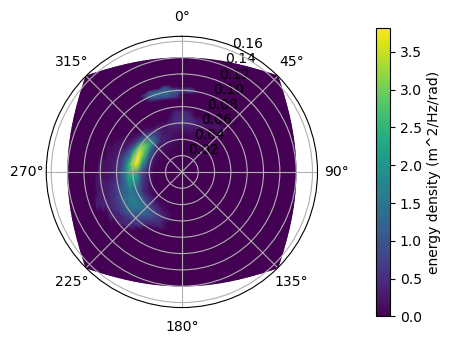

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(atomic_ds['direction'], # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    atomic_ds['frequency'],
                    atomic_ds['frequency_wave_spectrum'][100],
                    shading='gouraud',
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

NameError: name 'direction' is not defined

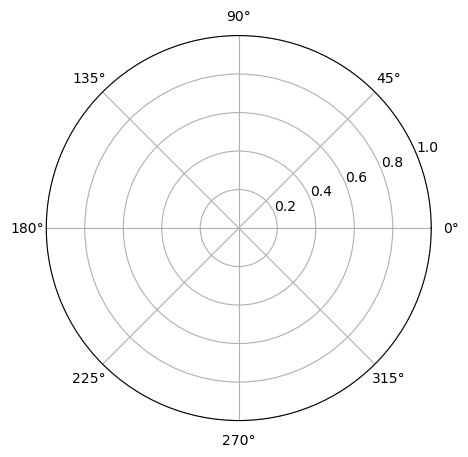

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    np.squeeze(energy_density_fq_dir[:,:,0])
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    atomic_ds['frequency_wave_spectrum'][100],
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

In [46]:
atomic_colocated_ds['secondary_wave_direction'][99]

<xarray.DataArray 'secondary_wave_direction' ()>
array(86.67917, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-01-19T17:21:16
    time_mask  float64 1.0
Attributes:
    long_name:  Secondary wave propagation direction
    units:      degree

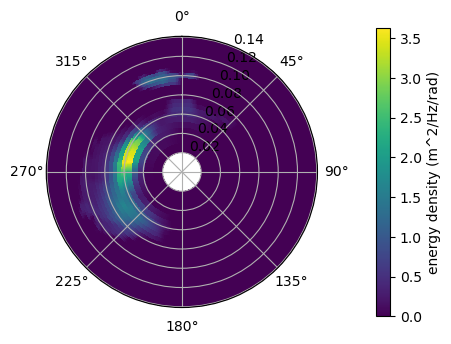

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    np.moveaxis(energy_density_fq_dir, -1, 0)[0]
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')



In [46]:
# energy_density_fq_dir.shape

(65, 65, 2)

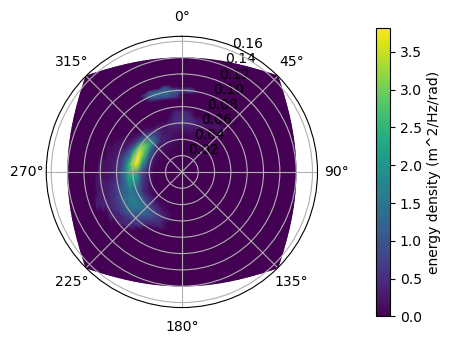

In [49]:
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    energy_density_fq_dir[:, :, 0],
                    shading='gouraud')

                    # **pcm_kwargs)

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

### Store

In [12]:
%%capture

%store earl_masked_ds
%store fiona_masked_ds
%store ian_masked_ds
%store julia_masked_ds
%store idalia_masked_ds
%store lee_masked_ds
%store atomic_masked_ds

%store all_wsra_df
%store atomic_df